In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **Importing Modules**

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 

# **Loading the Dataset**

In [8]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
##statistical info
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
##datatype info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

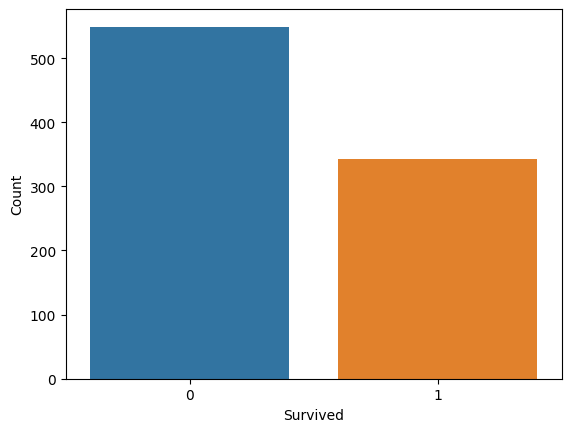

In [11]:
## categorical attributes
sns.countplot(data=train, x="Survived")

# Optionally, add labels and show the plot
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

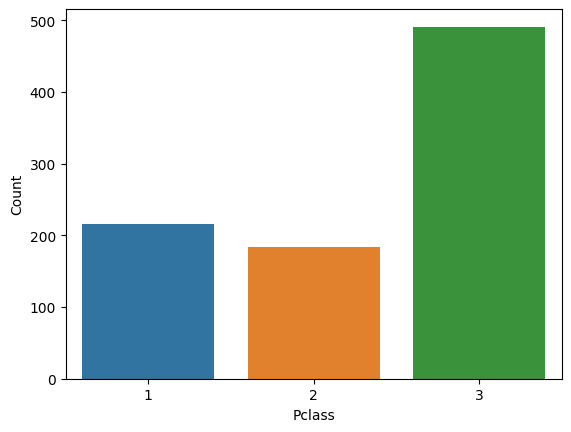

In [12]:
sns.countplot(data=train, x="Pclass")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.show()

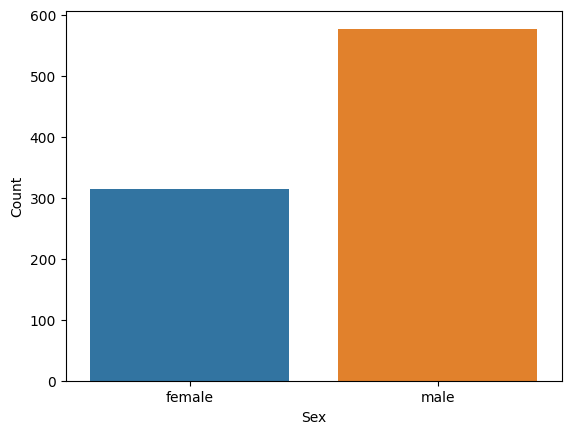

In [13]:
train['Sex'] = train['Sex'].astype('category')

# Create the countplot using Seaborn
sns.countplot(data=train, x='Sex')

# Optionally, add labels and show the plot
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

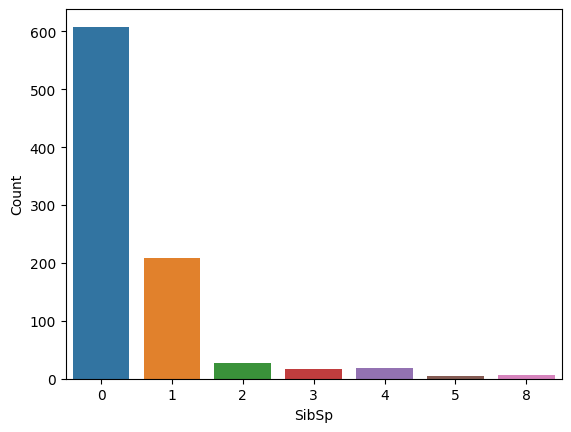

In [14]:
sns.countplot(data=train, x="SibSp")
plt.xlabel("SibSp")
plt.ylabel("Count")
plt.show()

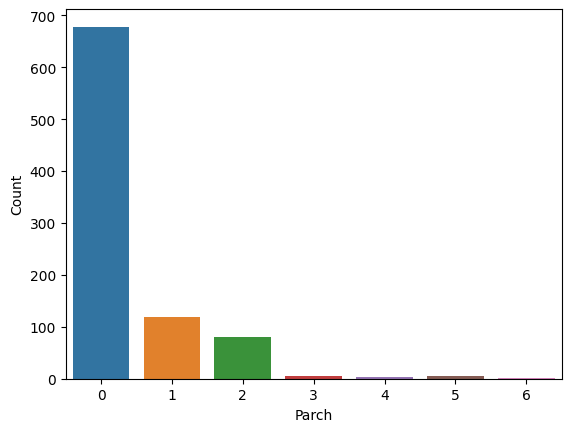

In [15]:
sns.countplot(data=train, x="Parch")
plt.xlabel("Parch")
plt.ylabel("Count")
plt.show()

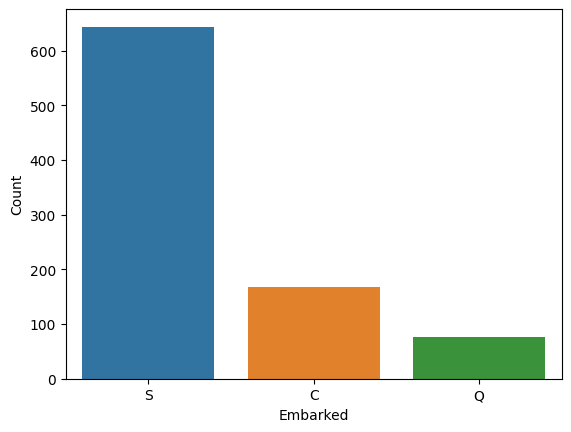

In [16]:
sns.countplot(data=train, x="Embarked")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

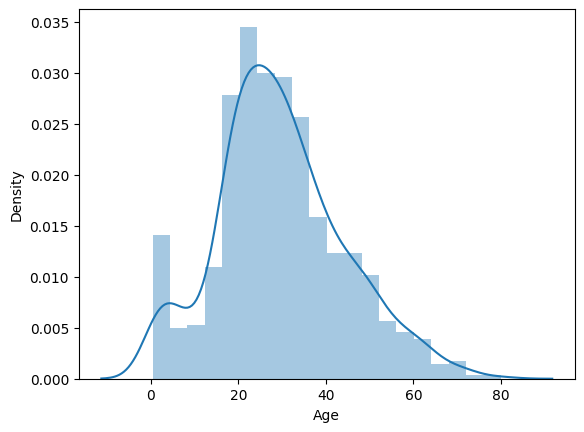

In [17]:
## numerical attributes
sns.distplot(train['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

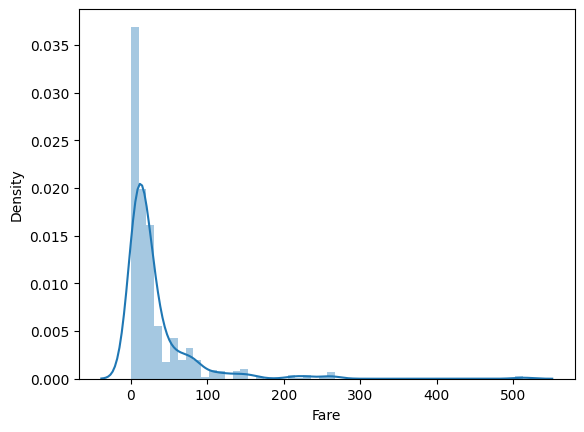

In [18]:
sns.distplot(train['Fare'])

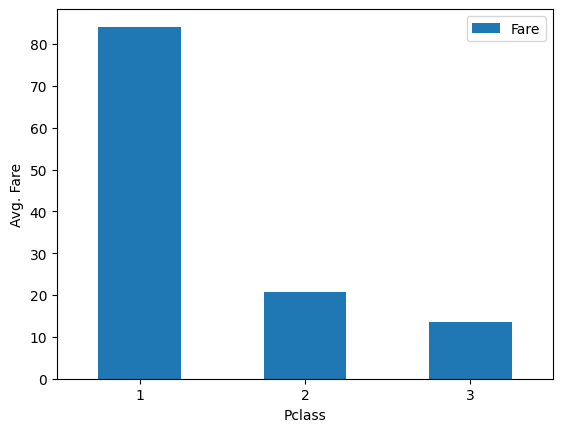

In [19]:
class_fare = train.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

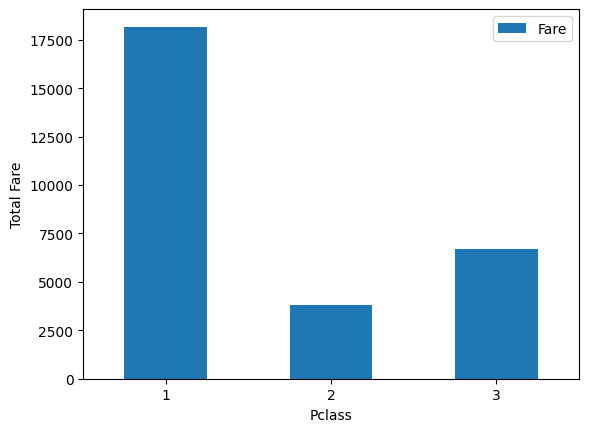

In [20]:
class_fare = train.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

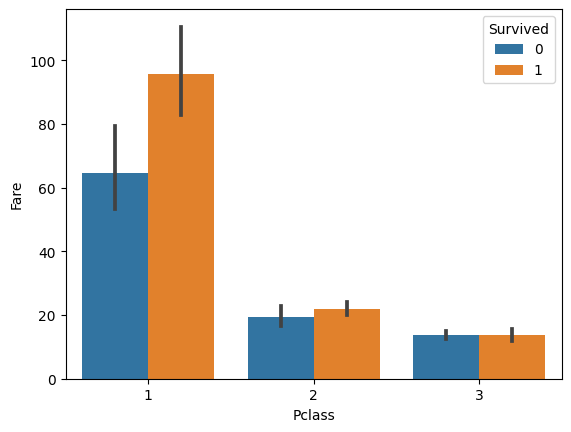

In [31]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

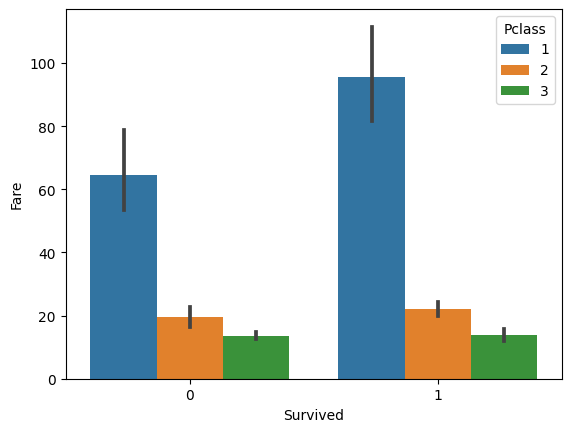

In [32]:
sns.barplot(data=train, x='Survived', y='Fare', hue='Pclass')

# Data Preprocessing

In [24]:
train.len = len(train)
#combine two dataframes
df = pd.concat([train,test], axis=0)
df = df.reset_index()
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df.tail()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [26]:
##finding the null values 
df.isnull().sum()

index             0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [27]:
##drop the column
df = df.drop(columns=['Cabin'],axis=1)

In [28]:
df['Age'].mean()

29.881137667304014

In [29]:
##fill missing values using mean of that column
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Age'].fillna(df['Fare'].mean())

In [30]:
df['Embarked'].mode()[0]

'S'

In [34]:
# fill missing values using mode of the categorical column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# log transformations for uniform data distributions

<Axes: xlabel='Fare', ylabel='Density'>

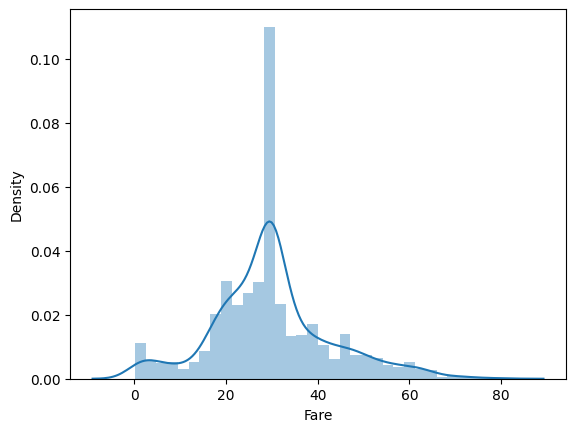

In [35]:
sns.distplot(df['Fare'])

In [ ]:
df['Fare'] = np.log(df['Fare']+1)

<Axes: xlabel='Fare', ylabel='Density'>

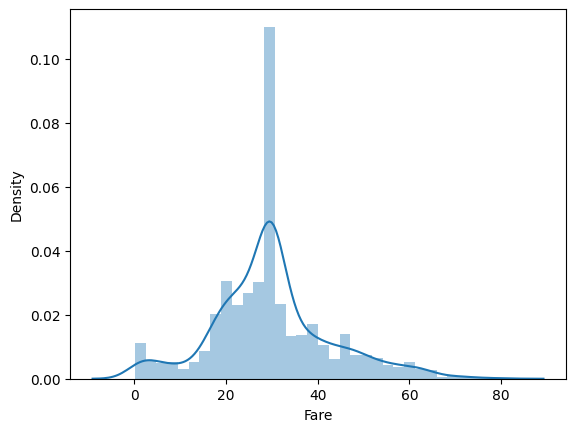

In [36]:
sns.distplot(df['Fare'])

# Correlation Matrix

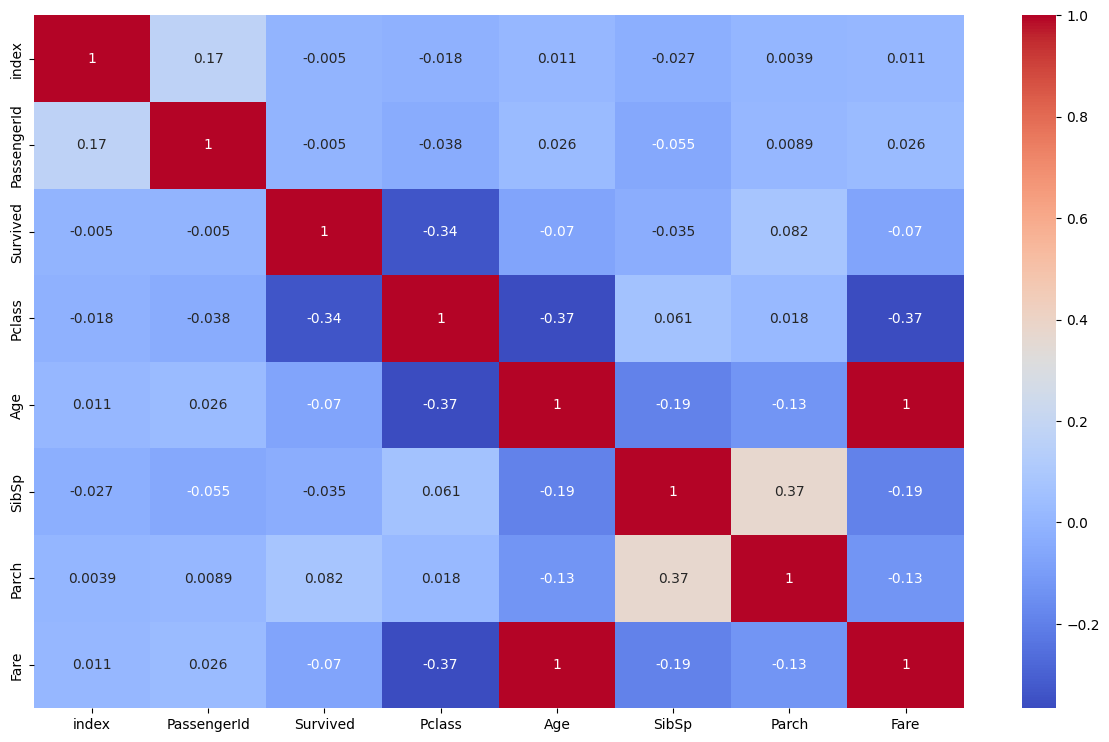

In [43]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [44]:
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,22.0,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,38.0,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,26.0,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,35.0,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,35.0,S


In [45]:
## drop unnecessary columns
df = df.drop(columns=['Name', 'Ticket'], axis=1)
df.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0.0,3,male,22.0,1,0,22.0,S
1,1,2,1.0,1,female,38.0,1,0,38.0,C
2,2,3,1.0,3,female,26.0,0,0,26.0,S
3,3,4,1.0,1,female,35.0,1,0,35.0,S
4,4,5,0.0,3,male,35.0,0,0,35.0,S


# Label encoding

In [46]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0.0,3,1,22.0,1,0,22.0,2
1,1,2,1.0,1,0,38.0,1,0,38.0,0
2,2,3,1.0,3,0,26.0,0,0,26.0,2
3,3,4,1.0,1,0,35.0,1,0,35.0,2
4,4,5,0.0,3,1,35.0,0,0,35.0,2


# Train-Test Split

In [52]:
train_len = 891
train = df.iloc[:train_len, :]
test = df.iloc[train_len:, :]

In [48]:
num_rows = df.shape[0]
print("Number of rows:", num_rows)

Number of rows: 1309


In [50]:
train.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0.0,3,1,22.0,1,0,22.0,2
1,1,2,1.0,1,0,38.0,1,0,38.0,0
2,2,3,1.0,3,0,26.0,0,0,26.0,2
3,3,4,1.0,1,0,35.0,1,0,35.0,2
4,4,5,0.0,3,1,35.0,0,0,35.0,2


In [53]:
test.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,0,892,NaN,3,1,34.5,0,0,34.5,1
892,1,893,NaN,3,0,47.0,1,0,47.0,2
893,2,894,NaN,2,1,62.0,0,0,62.0,1
894,3,895,NaN,3,1,27.0,0,0,27.0,2
895,4,896,NaN,3,0,22.0,1,1,22.0,2


In [57]:
# input split
X = train.drop(columns=['PassengerId', 'Survived'], axis=1)
y = train['Survived']

In [58]:
X.head()

,index,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,22.0,2
1,1,1,0,38.0,1,0,38.0,0
2,2,3,0,26.0,0,0,26.0,2
3,3,1,0,35.0,1,0,35.0,2
4,4,3,1,35.0,0,0,35.0,2


# Model Training

In [60]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify column
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))

In [61]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Accuracy: 0.8026905829596412
CV Score: 0.7912434875400163


In [62]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.7443946188340808
CV Score: 0.7453957692549119


In [63]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.8026905829596412
CV Score: 0.7756575230682318


In [64]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
classify(model)

Accuracy: 0.8071748878923767
CV Score: 0.7745527587722052


# Complete Model Training with Full Data 

In [65]:
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [72]:
test.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,0,892,NaN,3,1,34.5,0,0,34.5,1
892,1,893,NaN,3,0,47.0,1,0,47.0,2
893,2,894,NaN,2,1,62.0,0,0,62.0,1
894,3,895,NaN,3,1,27.0,0,0,27.0,2
895,4,896,NaN,3,0,22.0,1,1,22.0,2


In [68]:
# input split for test data
X_test = test.drop(columns=['PassengerId', 'Survived'], axis=1)

In [71]:
X_test.head()

,index,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,0,3,1,34.5,0,0,34.5,1
892,1,3,0,47.0,1,0,47.0,2
893,2,2,1,62.0,0,0,62.0,1
894,3,3,1,27.0,0,0,27.0,2
895,4,3,0,22.0,1,1,22.0,2


In [70]:
pred = model.predict(X_test)
pred

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

# Test Submission

In [73]:
sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [74]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [79]:
sub['Survived'] = pred
sub['Survived'] = sub['Survived'].astype('int')

In [80]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [81]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [83]:
sub.to_csv('submission.csv', index=False)